Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.3     v purrr   0.3.2
v tibble  3.1.2     v dplyr   1.0.6
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


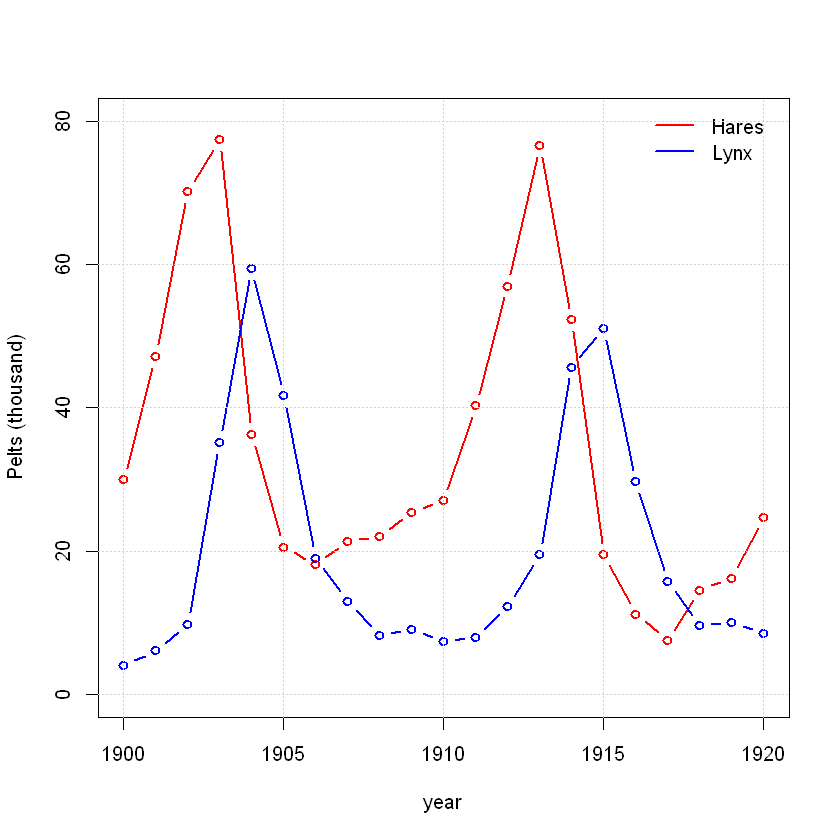

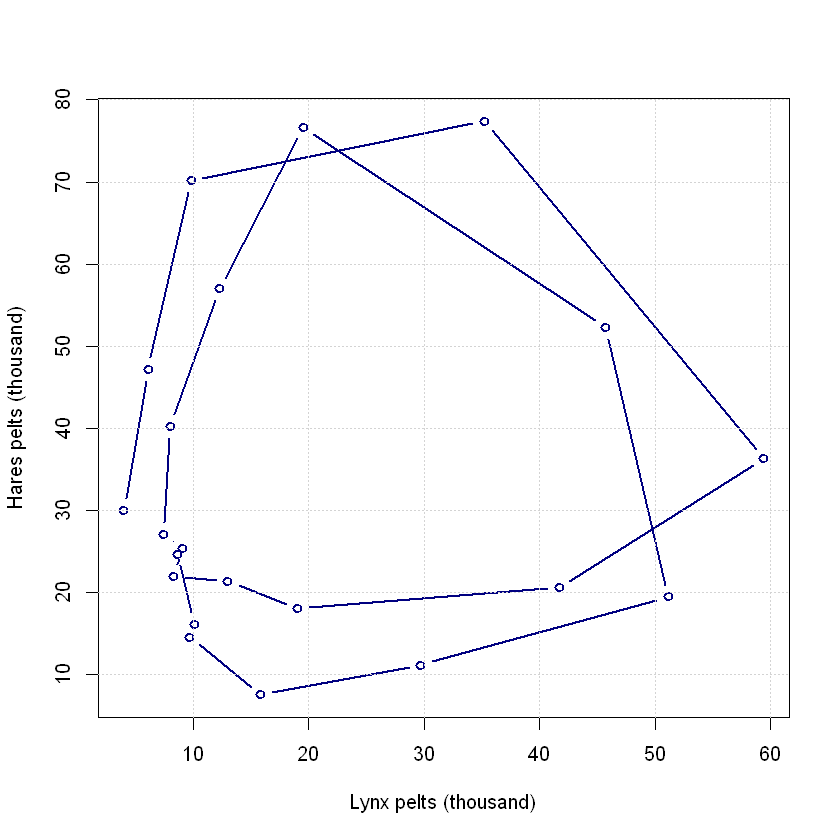

In [1]:
library(tidyverse)
Data <- read.csv("Lokta.csv")


plot(Data$Year, Data$Hares, type="b", col="red", lwd=2, ylab="Pelts (thousand)", xlab="year", ylim=c(0, 80))
lines(Data$Year, Data$Lynx, col="blue", lwd=2, type="b")
legend(1916, 83, legend=c("Hares", "Lynx"), col=c("red", "blue"), lwd=2, box.lty=0)
grid()

plot(Data$Lynx, Data$Hares, type="b", col="navy", lwd=2, ylab="Hares pelts (thousand)", xlab="Lynx pelts (thousand)")
grid()

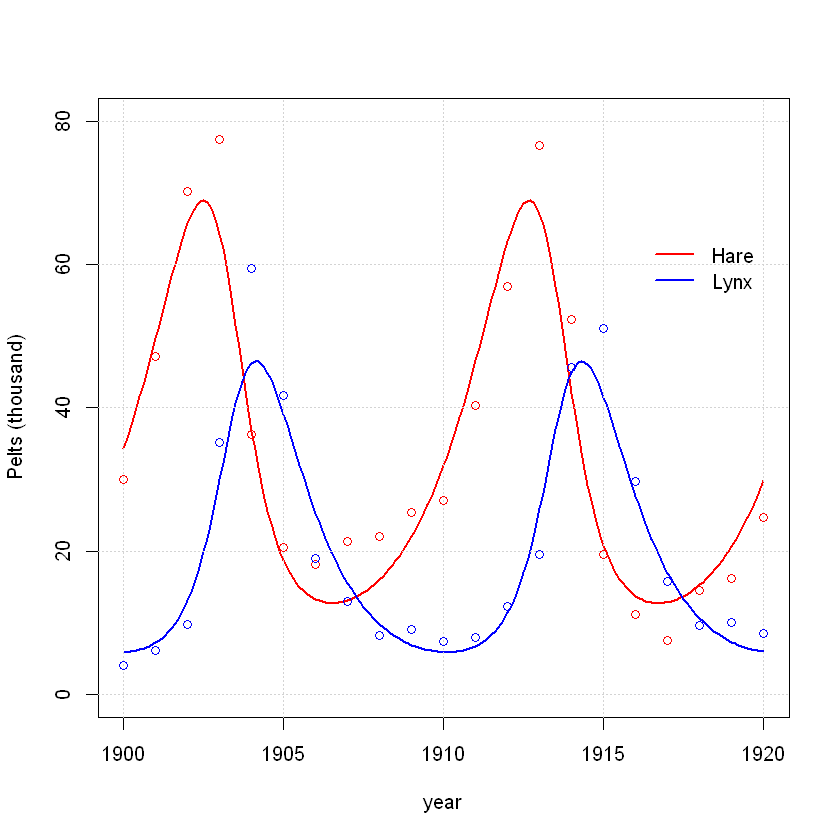

In [15]:
library(deSolve)

LotVmod <- function (Time, State, Pars) {
    with(as.list(c(State, Pars)), {
        du = u*(alpha - beta*v)
        dv = -v*(gamma - delta*u)
        return(list(c(du, dv)))
    })
}

Pars <- c(alpha =  0.5446, beta = 0.0277, gamma = 0.8025, delta = 0.0241)
State <- c(u = 34.3871, v = 5.9007)
Time <- seq(1900, 1920, by = 0.1)
out <- as.data.frame(ode(func = LotVmod, y = State, parms = Pars, times = Time))



plot(out[,1], out[,2], type="l", col="red", lwd=2, ylab="Pelts (thousand)", xlab="year", ylim=c(0,80))
lines(out[,1], out[,3], col="blue", lwd=2, type="l")
legend(1916, 65, legend=c("Hare", "Lynx"), col=c("red", "blue"), lwd=2, box.lty=0)
grid()
points(Data$Year, Data$Hares, col="red")
points(Data$Year, Data$Lynx, col="blue")



In [3]:
Data

N <- length(Data$Year) - 1
ts <- 1:N
y_init <- c(Data$Hare[1], Data$Lynx[1])
y <- as.matrix(Data[2:(N + 1), 2:3])
y <- cbind(y[ , 2], y[ , 1]);                                #hare, lynx order
stan_data <- list(N = N, ts = ts, y_init = y_init, y = y)

Year,Hares,Lynx
1900,30.0,4.0
1901,47.2,6.1
1902,70.2,9.8
1903,77.4,35.2
1904,36.3,59.4
1905,20.6,41.7
1906,18.1,19.0
1907,21.4,13.0
1908,22.0,8.3
1909,25.4,9.1


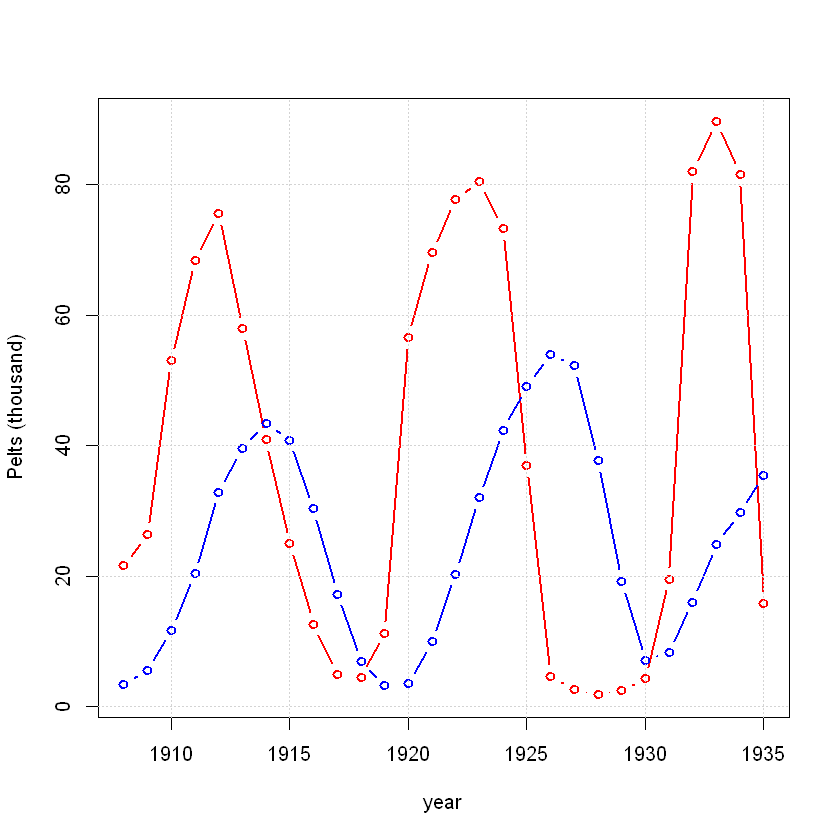

In [24]:
library(tidyverse)
Data2 <- read.csv("Volterra.csv", sep="")

plot(Data2$Year, Data2$Hare, type="b", col="red", lwd=2, ylab="Pelts (thousand)", xlab="year")
lines(Data2$Year, Data2$Lynx, col="blue", lwd=2, type="b")
legend(1916, 150, legend=c("Hares", "Lynx"), col=c("red", "blue"), lwd=2, box.lty=0)
grid()


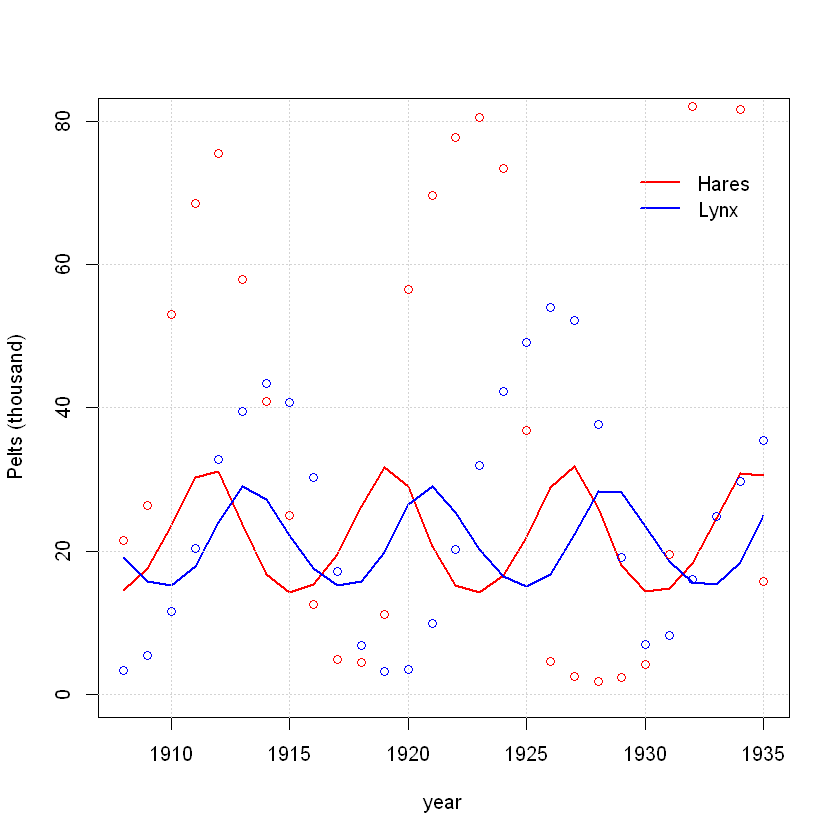

In [26]:
library(deSolve)

LotVmod <- function (Time, State, Pars) {
    with(as.list(c(State, Pars)), {
        du = u*(alpha - beta*v)
        dv = -v*(gamma - delta*u)
        return(list(c(du, dv)))
    })
}

Pars <- c(alpha =  1.025, beta = 0.048, gamma = 0.678, delta = 0.031)
State <- c(u = 14.534, v = 19.123)
Time <- seq(1908, 1935, by = 1)
out <- as.data.frame(ode(func = LotVmod, y = State, parms = Pars, times = Time))




plot(out[,1], out[,2], type="l", col="red", lwd=2, ylab="Pelts (thousand)", xlab="year", ylim=c(0, 80))
lines(out[,1], out[,3], col="blue", lwd=2, type="l")
legend(1929, 75, legend=c("Hares", "Lynx"), col=c("red", "blue"), lwd=2, box.lty=0)
grid()
points(Data2$Year, Data2$Hare, col="red")
points(Data2$Year, Data2$Lynx, col="blue")

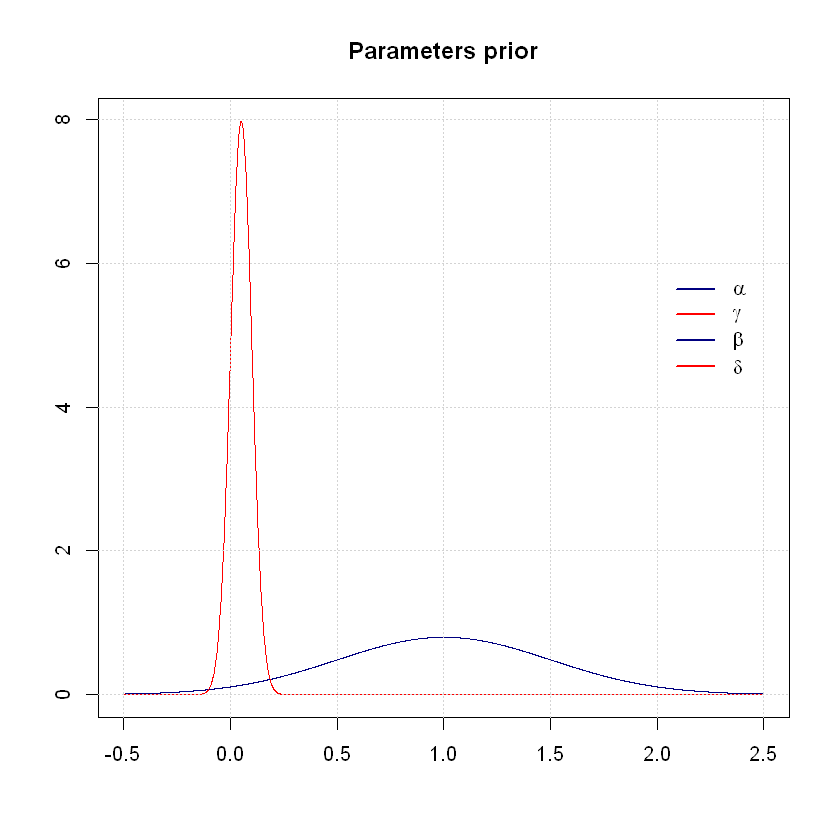

In [69]:
x<-seq(-0.5, 2.5, by=0.001)
P1<-dnorm(x, 1, 0.5)
P2<-dnorm(x, 0.05, 0.05)
plot(x, P1, col="navy", type="l", ylim=c(0,max(P2)), xlab="", ylab="", main="Parameters prior")
lines(x, P2, col="red")
legend(2, 6, legend=c(expression(alpha,gamma), expression(beta,delta)), col=c("navy", "red"), lwd=2, box.lty=0)
grid()

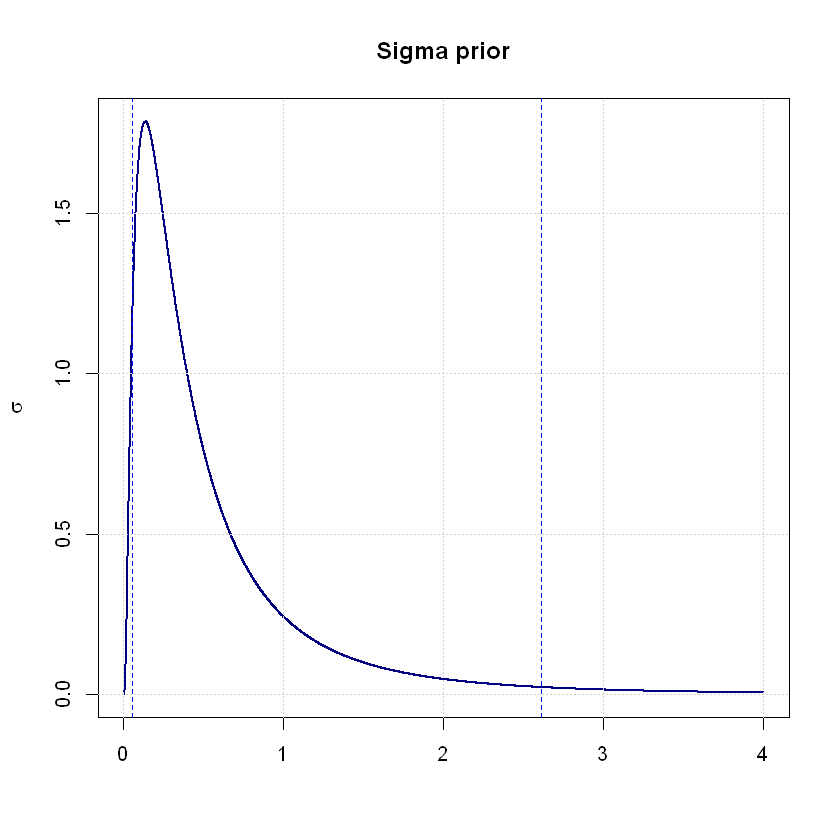

In [76]:
x<-seq(0, 4, by=0.001)
P<-dlnorm(x, -1, 1)
bottom<-qlnorm(0.025, -1, 1)
top<-qlnorm(0.975, -1, 1)
plot(x, P, col="navy", type="l", xlab="", ylab=expression(sigma), main="Sigma prior", lwd=2)
abline(v=top, lty=2, col="blue")
abline(v=bottom, lty=2, col="blue")
grid()

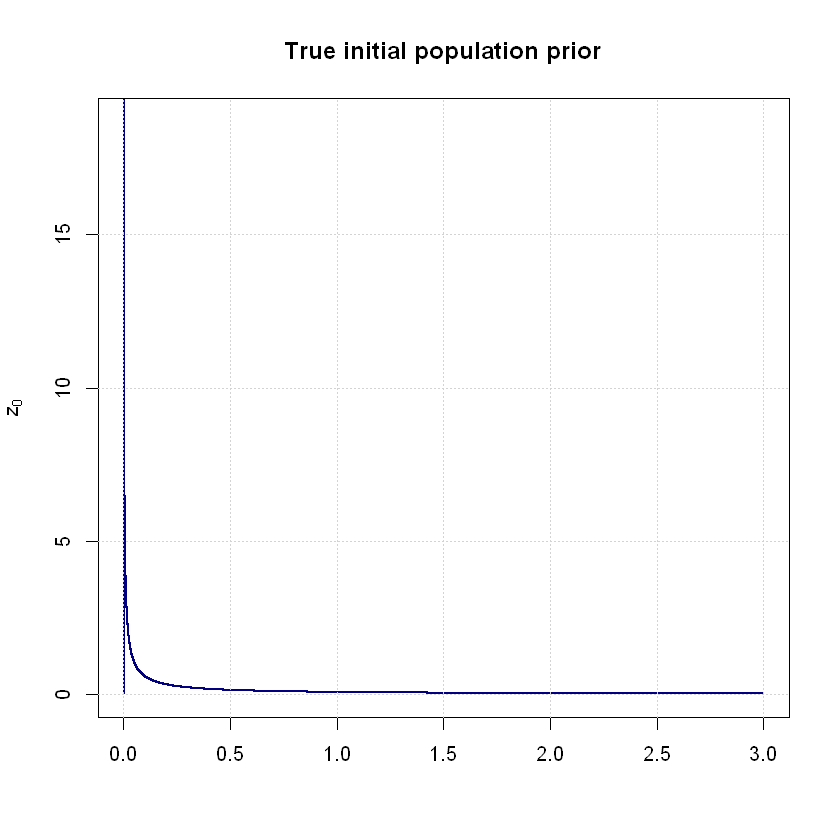

In [103]:
x<-seq(0, 3, by=0.0001)

P<-dlnorm(x, log(5), 5)


plot(x, P, col="navy", type="l", xlab="", ylab=expression(z[0]), main="True initial population prior", 
     lwd=2, ylim=c(0,max(P2)))
grid()

In [ ]:
#Stan Model

functions {
    
    real[] dz_dt(real t, real[] z, real[] theta, real[] x_r, int[] x_i) {

    real dx_dt = (theta[1] - theta[2] * z[2]) * z[1];
    real dy_dt = (-theta[3] + theta[4] * z[1]) * z[2];
        
    return { dx_dt, dy_dt };

  }
}


data {
    
    int<lower = 0> N;           #Number of measurement times
    real ts[N];                 #Measurement times > 0
    real y0[2];             #Initial measured populations
    real<lower = 0> y[N, 2];    #Measured populations
}


parameters {
    
    real<lower = 0> theta[4];   #Alpha, Beta, Gamma, Delta 
    real<lower = 0> z0[2];  #Initial population
    real<lower = 0> sigma[2];   #Measurement errors
    
}

transformed parameters {
    
    real z[N, 2] = integrate_ode_adams(dz_dt, z0, 0, ts, theta, rep_array(0.0, 0), rep_array(0, 0), 1e-6, 1e-6, 5e2);

}


model {
    
    theta[{1, 3}] ~ normal(1, 1);
    theta[{2, 4}] ~ normal(0.05, 0.05);
    
    sigma ~ lognormal(-1, 1);
    
    z0[1] ~ lognormal(log(30), 5);
    z0[2] ~ lognormal(log(5), 5);

    for (k in 1:2) {
        y0[k] ~ lognormal(log(z0[k]), sigma[k]);
        y[ , k] ~ lognormal(log(z[, k]), sigma[k]);
    }
    
}

In [108]:
names <- list("d1", "d2", "d3")

for(i in 1:3){
    names[i] <- i
}

cat(d1)

ERROR: Error in cat(d1): oggetto "d1" non trovato
